In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#import functools

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv", sep=";", encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61739 entries, 0 to 61738
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome_munic     61739 non-null  object 
 1   codigo_ibge    61739 non-null  int64  
 2   dia            61739 non-null  int64  
 3   mes            61739 non-null  int64  
 4   datahora       61739 non-null  object 
 5   casos          61739 non-null  int64  
 6   casos_novos    61739 non-null  int64  
 7   casos_pc       61739 non-null  object 
 8   casos_mm7d     61739 non-null  object 
 9   obitos         61739 non-null  int64  
 10  obitos_novos   61739 non-null  int64  
 11  obitos_pc      61739 non-null  object 
 12  obitos_mm7d    61739 non-null  object 
 13  letalidade     61739 non-null  object 
 14  nome_ra        61632 non-null  object 
 15  cod_ra         61739 non-null  int64  
 16  nome_drs       61632 non-null  object 
 17  cod_drs        61739 non-null  int64  
 18  pop   

In [4]:
df


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61734,Ignorado,9999999,6,6,2020-06-06,128,8,"0,000000e+00","-7,1428571",9,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",23
61735,Ignorado,9999999,7,6,2020-06-07,113,-15,"0,000000e+00","-3,1428571",7,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",24
61736,Ignorado,9999999,8,6,2020-06-08,108,-5,"0,000000e+00","1,0000000",8,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",24
61737,Ignorado,9999999,9,6,2020-06-09,106,-2,"0,000000e+00","-0,8571429",1,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",24


In [36]:
def dados(cidade):
    filt=df['nome_munic'] == cidade
    print("Dia: " + df[filt]['datahora'].tail(1).tolist()[0])
    print("Cidade:" + cidade)
    pop=df[filt]['pop'].tolist()
    print("População:" + str(pop[0]))
    x=df[filt]['obitos'].tolist()
    total = df[filt]['obitos'].tolist()
    print("Total de obitos:" + str(total[len(total)-1]))
    obitos_dia=df[filt]['obitos'].tail(2).tolist()
    print("Óbitos hoje: " +str(obitos_dia[1] - obitos_dia[0]))
    print("Índice (óbitos em cada 1000):"+ str(total[len(total)-1]/pop[0]*1000))
    plt.title(cidade)
    plt.plot(x, label='Óbitos')
    plt.grid()
    #
    x=df[filt]['casos'].tolist()
    total = df[filt]['casos'].tolist()
    print("Total de casos:" + str(total[len(total)-1]))
    print("Índice (casos por mil):"+ str(total[len(total)-1]/pop[0]*1000))
    plt.title(cidade)
    plt.plot(x, label='Casos acumulados')
    plt.grid()
    #
    x=df[filt]['casos_novos'].tolist()
    plt.plot(x, label="Casos Novos por dia")
    print("Casos hoje:" + str(x[len(x)-1]))
    plt.grid()
    plt.legend()
    #plt.savefig('./new_plot.png')



Dia: 2020-06-10
Cidade:São Paulo
População:11869660
Total de obitos:5232
Óbitos hoje: 159
Índice (óbitos em cada 1000):0.44078768894812487
Total de casos:80457
Índice (casos por mil):6.778374443749864
Casos hoje:2431


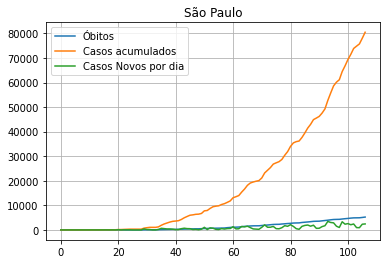

In [37]:
dados("São Paulo")

Dia: 2020-06-10
Cidade:Piracicaba
População:389873
Total de obitos:40
Óbitos hoje: 3
Índice (óbitos em cada 1000):0.10259751252330887
Total de casos:931
Índice (casos por mil):2.387957103980014
Casos hoje:35


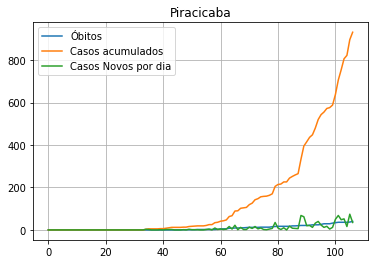

In [38]:
dados("Piracicaba")

Dia: 2020-06-10
Cidade:Campinas
População:1175501
Total de obitos:121
Óbitos hoje: 5
Índice (óbitos em cada 1000):0.10293483374322948
Total de casos:3121
Índice (casos por mil):2.6550381496910678
Casos hoje:207


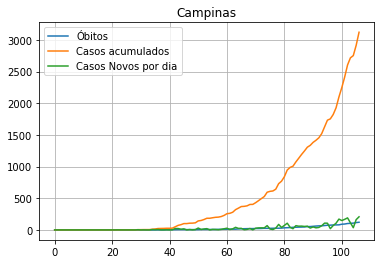

In [39]:
dados("Campinas")

Dia: 2020-06-10
Cidade:Santos
População:428703
Total de obitos:192
Óbitos hoje: 2
Índice (óbitos em cada 1000):0.44786250621059337
Total de casos:4976
Índice (casos por mil):11.607103285957878
Casos hoje:257


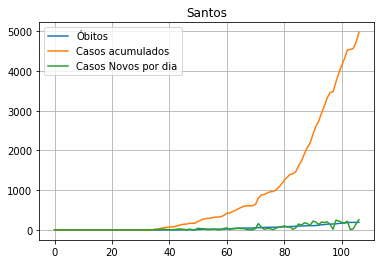

In [40]:
dados("Santos")

Dia: 2020-06-10
Cidade:Santo André
População:693867
Total de obitos:186
Óbitos hoje: 9
Índice (óbitos em cada 1000):0.2680628996623272
Total de casos:3527
Índice (casos por mil):5.083106704887248
Casos hoje:151


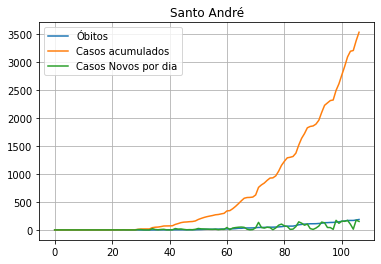

In [41]:
dados("Santo André")

Dia: 2020-06-10
Cidade:Sumaré
População:283212
Total de obitos:12
Óbitos hoje: 0
Índice (óbitos em cada 1000):0.042371085970933434
Total de casos:350
Índice (casos por mil):1.235823340818892
Casos hoje:39


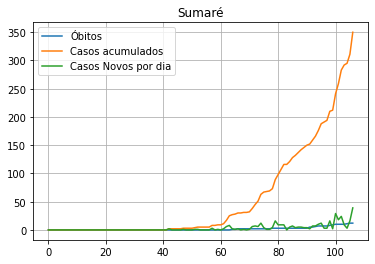

In [42]:
dados("Sumaré")

Dia: 2020-06-10
Cidade:Hortolândia
População:230268
Total de obitos:15
Óbitos hoje: 0
Índice (óbitos em cada 1000):0.06514148731043828
Total de casos:255
Índice (casos por mil):1.1074052842774507
Casos hoje:16


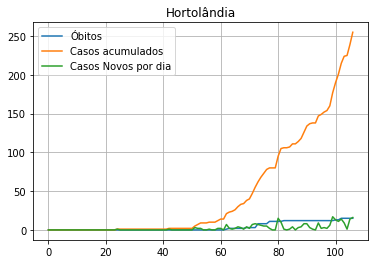

In [43]:
dados("Hortolândia")

Dia: 2020-06-10
Cidade:Americana
População:233458
Total de obitos:9
Óbitos hoje: 0
Índice (óbitos em cada 1000):0.03855083141293081
Total de casos:182
Índice (casos por mil):0.7795834796837119
Casos hoje:12


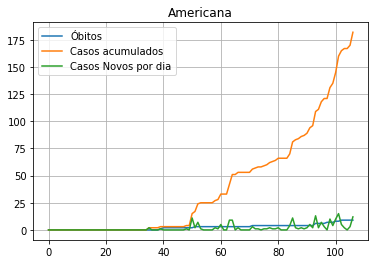

In [44]:
dados("Americana")

Dia: 2020-06-10
Cidade:Sorocaba
População:658547
Total de obitos:71
Óbitos hoje: 8
Índice (óbitos em cada 1000):0.1078131097704492
Total de casos:1361
Índice (casos por mil):2.0666710196842444
Casos hoje:39


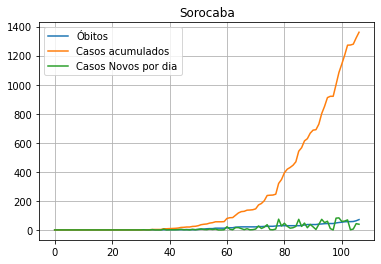

In [45]:
dados("Sorocaba")

População:683777
Total de obitos:45
Índice (óbitos em cada 1000):0.06581092958669273
Total de casos:1549
Índice (casos por mil):2.265358442884157
Casos hoje:99


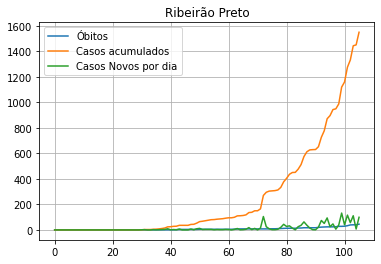

In [15]:
dados("Ribeirão Preto")

População:59614
Total de obitos:3
Índice (óbitos em cada 1000):0.050323749454826046
Total de casos:76
Índice (casos por mil):1.2748683195222599
Casos hoje:9


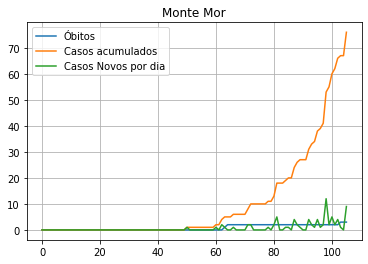

In [16]:
dados("Monte Mor")

População:54231
Total de obitos:0
Índice (óbitos em cada 1000):0.0
Total de casos:57
Índice (casos por mil):1.0510593571942248
Casos hoje:0


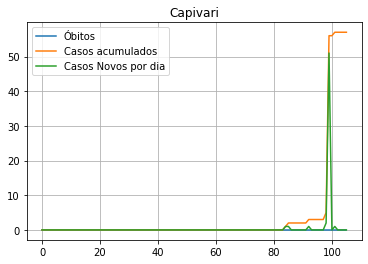

In [17]:
dados("Capivari")